### Importing the required libraries, packages and modules

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

### Checking the version

In [3]:
print(tf.__version__)

2.2.0


### Loading the data

In [4]:
fashion_mnist= keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


### Understanding the dimensions of the data

In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Scaling the data

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [12]:
train_images=train_images/255.0
test_images=test_images/255.0

### Creating the model

In [15]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [17]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4800 - accuracy: 0.8276
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3595 - accuracy: 0.8684
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3248 - accuracy: 0.8805
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3015 - accuracy: 0.8893
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2844 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.8987
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2572 - accuracy: 0.9042
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2446 - accuracy: 0.9066
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2357 - accuracy: 0.9107
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.228

### Measuring the accuracy

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3386 - accuracy: 0.8819

Test accuracy: 0.8819000124931335


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

### Making necessary predictions

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([1.8885748e-07, 2.8091823e-05, 6.3843618e-07, 2.5352563e-06,
       7.6904342e-07, 1.2195691e-03, 3.2230737e-08, 2.1767810e-02,
       5.7520989e-08, 9.7698033e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [25]:
img = test_images[1]

print(img.shape)

(28, 28)


In [26]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.3000269e-05 7.3933302e-13 9.9840802e-01 1.4458140e-08 4.4297494e-04
  6.4694188e-14 1.0960682e-03 4.8987944e-14 8.3239131e-11 4.5444074e-13]]


### Using the trained model

Here we take one specific input image and predict the output label and plot it.

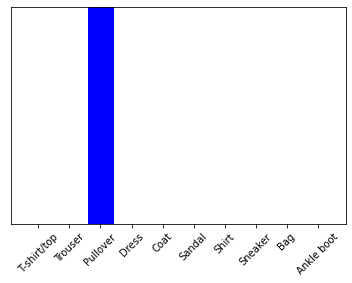

In [29]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)